### CSCN8010
#### Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

The link below shows the dataset link that we used in this assignment. 

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

this is a description about the features and the target in this dataset.
**Target:** 
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

### Part 1

#### 1. Get the data.

In [42]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
raw_data = load_diabetes(as_frame=True)
X = raw_data.data
y = raw_data.target

# Display features and target
print("Features:", X.columns.tolist())
print("Target:", raw_data.target.name)


Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target: target


#### 2. Frame the Problem.

In [43]:
# Identify features and target



print("Target description: Disease progression one year after baseline")
print("Problem: Predict disease progression one year after baseline using patient features.")



Target description: Disease progression one year after baseline
Problem: Predict disease progression one year after baseline using patient features.


#### 3. EDA - Describe the data, explore it, and provide insights about it. 

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

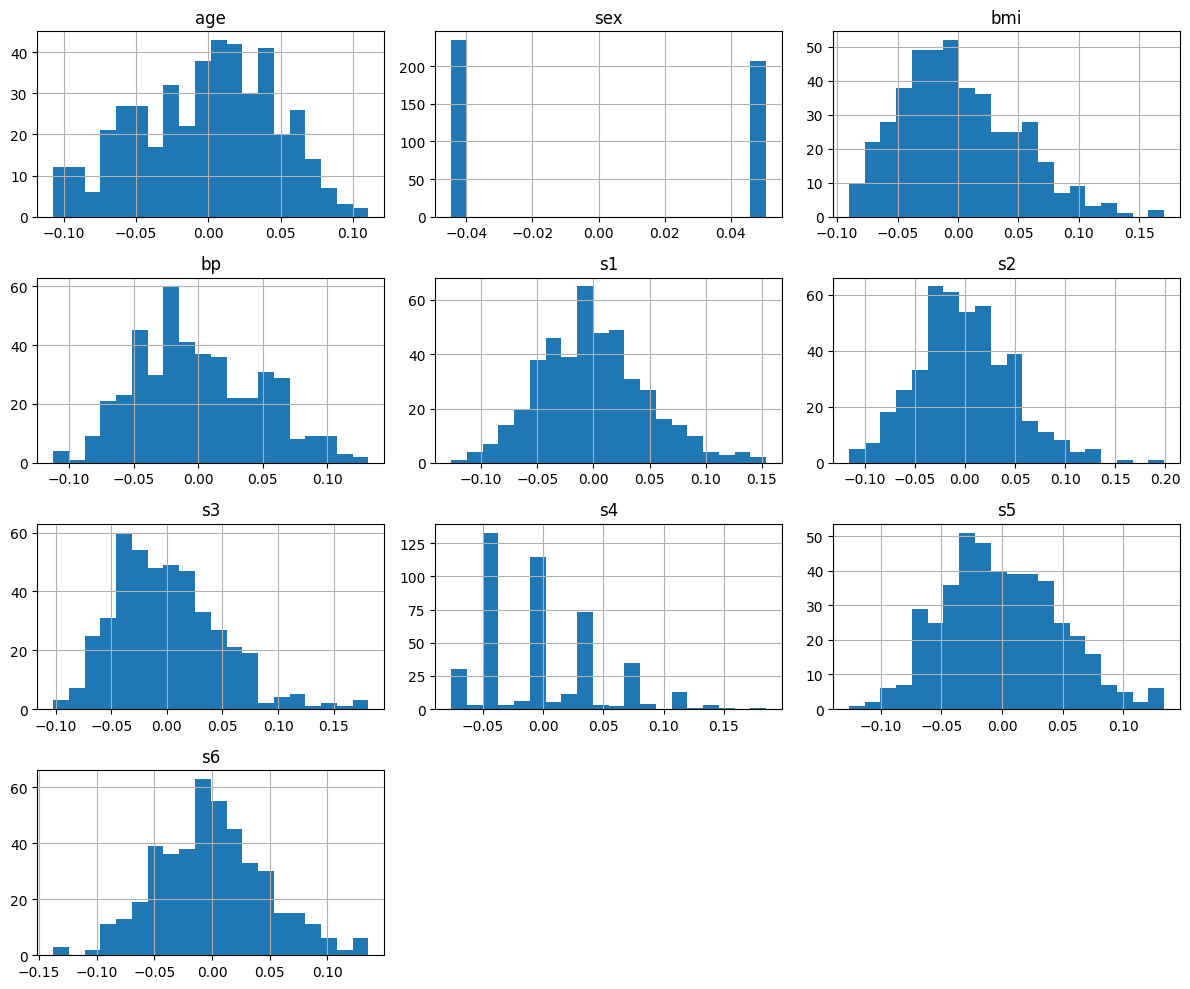

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(X.describe())

# Histograms
X.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


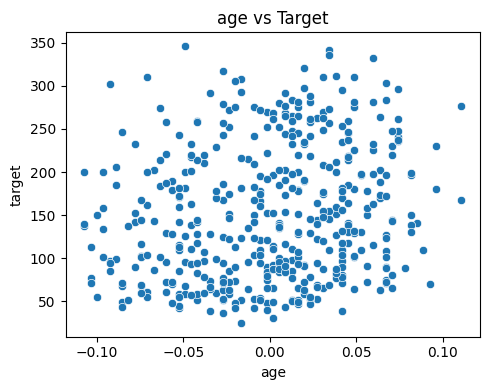

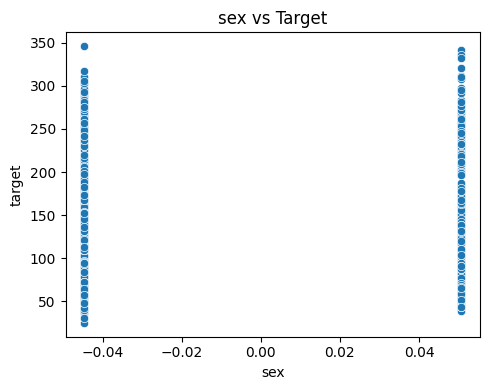

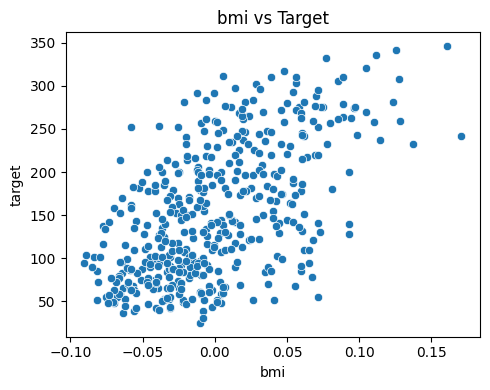

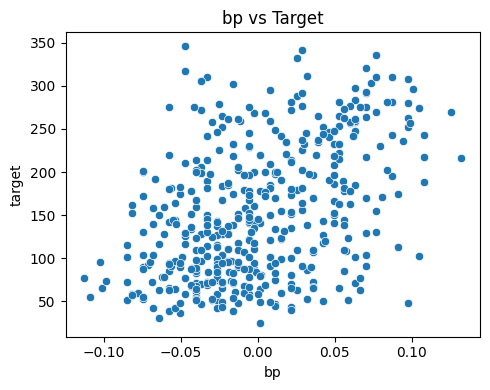

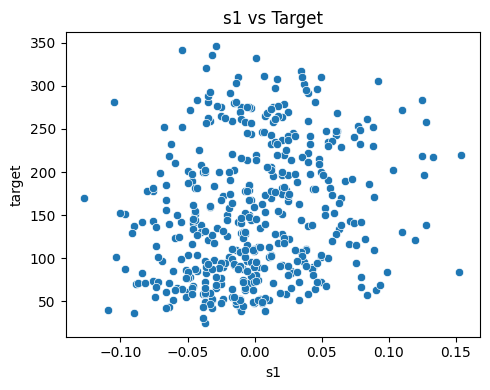

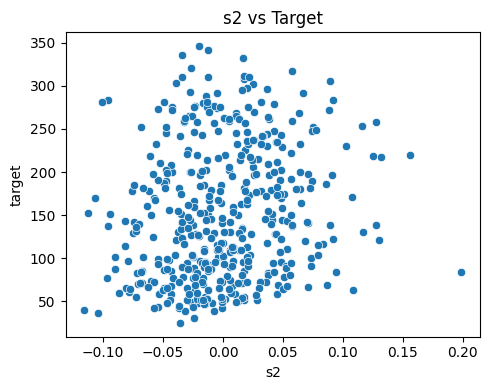

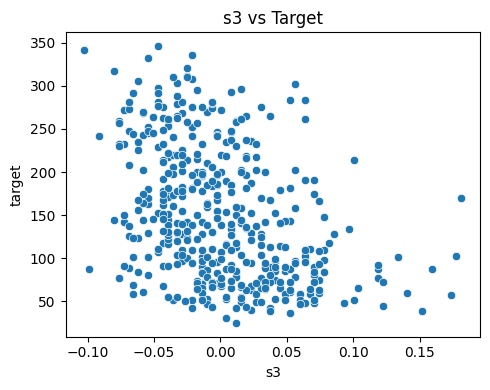

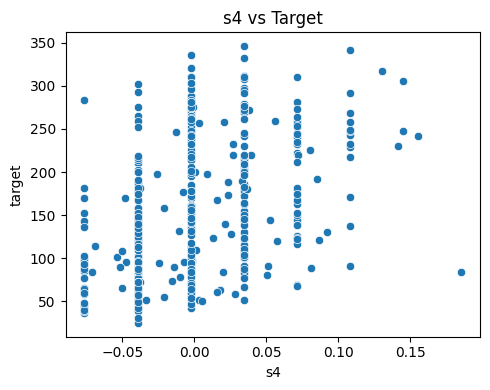

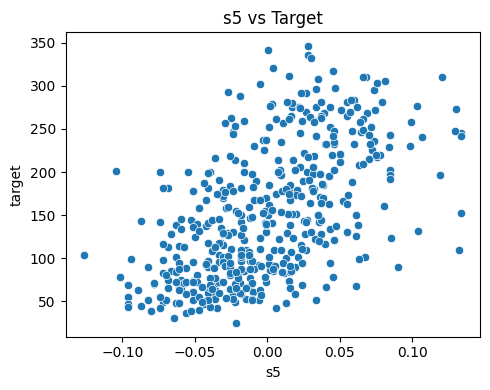

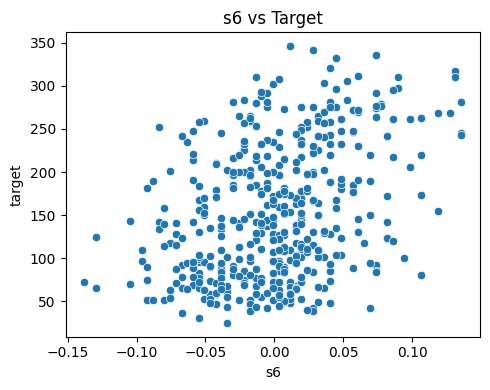

In [45]:

# Scatter plots with target
target_df = pd.concat([X, y.rename("target")], axis=1)
for col in X.columns:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=target_df, x=col, y="target")
    plt.title(f"{col} vs Target")
    plt.tight_layout()

    plt.show()

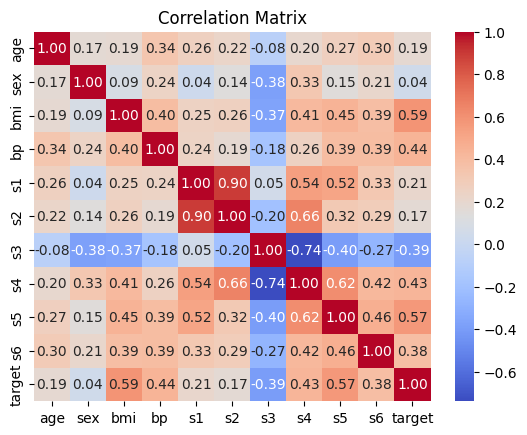

In [46]:
# Correlation matrix
corr = target_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#### 4. Clean the data

In [47]:
# Check for missing values
X.isnull().sum()


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

#### 5. Split the dataset

In [48]:
from sklearn.model_selection import train_test_split

# 75% train, 10% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.10/0.85, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Train set size: (330, 10)
Validation set size: (45, 10)
Test set size: (67, 10)


### Part 2

### 6: Fit Polynomial Regression Models (degrees 0–5) on BMI feature

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

import numpy as np
import matplotlib.pyplot as plt

# Prepare the data (BMI feature only)
X_train_bmi = X_train[["bmi"]]
X_val_bmi = X_val[["bmi"]]
X_test_bmi = X_test[["bmi"]]

train_results = []
val_results = []
models = []

for degree in range(6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append((degree, model, poly))

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

    train_results.append([degree, train_r2, train_mae, train_mape])
    val_results.append([degree, val_r2, val_mae, val_mape])

#### 7: Create Summary Table for Train/Validation Performance

In [50]:
train_df = pd.DataFrame(train_results, columns=["Degree", "Train R2", "Train MAE", "Train MAPE"])
val_df = pd.DataFrame(val_results, columns=["Degree", "Val R2", "Val MAE", "Val MAPE"])
results_df = pd.merge(train_df, val_df, on="Degree")
results_df.set_index("Degree", inplace=True)
results_df

,Train R2,Train MAE,Train MAPE,Val R2,Val MAE,Val MAPE
Degree,,,,,,
0,0.000000,66.548209,0.633521,-0.000011,63.447475,0.587933
1,0.354240,52.278064,0.484624,0.449292,41.997581,0.404450
2,0.354771,52.267273,0.484479,0.449158,41.757683,0.403099
3,0.355002,52.223375,0.483564,0.447291,41.741042,0.402590
4,0.357983,51.944372,0.479635,0.449064,41.952846,0.402406
5,0.358910,51.813830,0.478315,0.453513,42.083400,0.403405


#### 8: Identify the Best Model Based on Validation Performance

In [51]:
best_index = results_df["Val R2"].idxmax()
best_degree, best_model, best_poly = models[best_index]
print(f"Best model is of degree {best_degree} with validation R2 = {results_df.loc[best_index, 'Val R2']:.4f}")

Best model is of degree 5 with validation R2 = 0.4535


#### 9: Run the chosen model on the test set and provide results

In [52]:
# Prepare test set for best degree polynomial
X_test_poly = best_poly.transform(X_test_bmi)

# Predict on test set
y_test_pred = best_model.predict(X_test_poly)

# Calculate metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test R2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")


Test R2: 0.1973
Test MAE: 54.5484
Test MAPE: 0.4788


#### 10: Plot graph of train, validation, and test data points, plus fit of chosen model

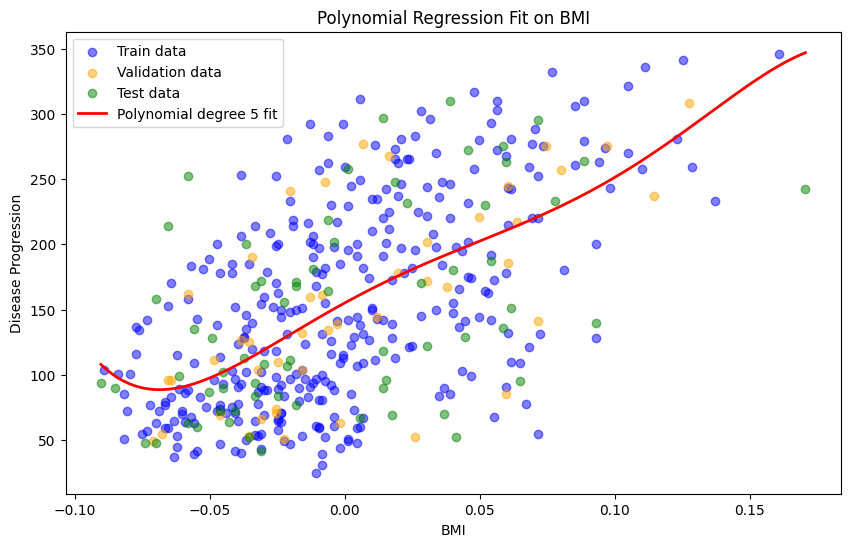

In [53]:

# ...existing code...

# Create BMI range for plotting the fit curve
bmi_range = np.linspace(X["bmi"].min(), X["bmi"].max(), 300)
bmi_range_df = pd.DataFrame({'bmi': bmi_range})  # Use DataFrame with correct column name
bmi_range_poly = best_poly.transform(bmi_range_df)
y_fit = best_model.predict(bmi_range_poly)

plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.5, label='Train data')
plt.scatter(X_val_bmi, y_val, color='orange', alpha=0.5, label='Validation data')
plt.scatter(X_test_bmi, y_test, color='green', alpha=0.5, label='Test data')

# Plot model fit line
plt.plot(bmi_range, y_fit, color='red', linewidth=2, label=f'Polynomial degree {best_degree} fit')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression Fit on BMI')
plt.legend()
plt.show()

# ...existing code...

#### 11: Write down the equation of the best model (2 decimal digits)

In [54]:
coefficients = best_model.coef_
intercept = best_model.intercept_

# For polynomial degree d, equation is: y = intercept + coef_1*x + coef_2*x^2 + ...
equation_terms = [f"{intercept:.2f}"]
for power, coef in enumerate(coefficients[1:], start=1):
    equation_terms.append(f"{coef:.2f}*x^{power}")

equation_str = " + ".join(equation_terms)
print("Best model equation:")
print("y = " + equation_str)


Best model equation:
y = 155.08 + 1131.59*x^1 + -3946.02*x^2 + -26110.86*x^3 + 768725.87*x^4 + -2823251.97*x^5


#### 12: Predict diabetes progression for a chosen BMI value



In [55]:


# ...existing code...

# Suppose your model and PolynomialFeatures were trained with a feature named 'bmi'
bmi_value = 0.05
bmi_df = pd.DataFrame({'bmi': [bmi_value]})

# If you use PolynomialFeatures

bmi_poly = best_poly.transform(bmi_df)
prediction = best_model.predict(bmi_poly)


print(f"Predicted diabetes progression for BMI={bmi_value}: {prediction[0]:.2f}")

# ...existing code...

Predicted diabetes progression for BMI=0.05: 202.46


#### 13: Number of trainable parameters for each model

In [56]:
feature_names = best_poly.get_feature_names_out(["bmi"])
print(f"Features for polynomial degree {best_degree}: {feature_names}")
print(f"Number of trainable parameters: {len(feature_names)}")

# Explanation:
# For polynomial regression, number of trainable parameters = number of polynomial features = degree + 1 (including bias)


Features for polynomial degree 5: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']
Number of trainable parameters: 6


#### 14: Conclusion Section

**Conclusion**

- The best univariate polynomial regression model on BMI was of degree {best_degree} with validation R² = {results_df.loc[best_index, 'Val R2']:.4f} and test R² = {test_r2:.4f}.
- The model achieved reasonable predictive performance as indicated by MAE and MAPE scores on both validation and test sets.
- Visual inspection of the fitted curve shows that while the model fits the general trend, it may underperform at the extremes of BMI values due to limited data points and the univariate nature.
- Limitations:
    - Using BMI alone ignores other important patient features affecting diabetes progression.
    - Polynomial regression can overfit at higher degrees, and is sensitive to outliers.
    - The model assumes a fixed polynomial relationship, which might not capture complex nonlinear patterns.
    - Since the features are standardized, the model coefficients correspond to scaled input, which might affect interpretability in raw units.
- Future work:
    - Extend modeling to multivariate polynomial regression including other features.
    - Try more flexible models like decision trees or kNN to capture nonlinear relationships.
    - Use cross-validation for more robust hyperparameter tuning.


### Part 3

#### 1.Two polynomial models

In [57]:
# Example for degree 2
poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly2 = poly2.fit_transform(X_train)
X_val_poly2 = poly2.transform(X_val)
X_test_poly2 = poly2.transform(X_test)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

# Repeat evaluation and store results

# Repeat similarly for degree 3


LinearRegression()

#### 2. Two decision tree models 

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree1.fit(X_train, y_train)
# Evaluate on val and test

tree2 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree2.fit(X_train, y_train)
# Evaluate on val and test


DecisionTreeRegressor(max_depth=5, random_state=42)

#### 3. Two kNN models

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train, y_train)
# Evaluate on val and test

knn2 = KNeighborsRegressor(n_neighbors=7)
knn2.fit(X_train, y_train)
# Evaluate on val and test


KNeighborsRegressor(n_neighbors=7)

In [60]:
# Final summary of all models

# Generate predictions for polynomial models (degrees 0–5) on BMI
poly_preds_train = []
poly_preds_val = []
poly_preds_test = []
for degree, model, poly in models:
    poly_preds_train.append(model.predict(poly.transform(X_train[["bmi"]])))
    poly_preds_val.append(model.predict(poly.transform(X_val[["bmi"]])))
    poly_preds_test.append(model.predict(poly.transform(X_test[["bmi"]])))

# Multivariate polynomial degree 2
y_train_pred_mv2 = model_poly2.predict(X_train_poly2)
y_val_pred_mv2 = model_poly2.predict(X_val_poly2)
y_test_pred_mv2 = model_poly2.predict(X_test_poly2)

# Multivariate polynomial degree 3 (assuming you have model_poly3, X_train_poly3, etc.)
# If not, you need to fit and transform for degree 3 as you did for degree 2
from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly3 = poly3.fit_transform(X_train)
X_val_poly3 = poly3.transform(X_val)
X_test_poly3 = poly3.transform(X_test)
from sklearn.linear_model import LinearRegression
model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly3, y_train)
y_train_pred_mv3 = model_poly3.predict(X_train_poly3)
y_val_pred_mv3 = model_poly3.predict(X_val_poly3)
y_test_pred_mv3 = model_poly3.predict(X_test_poly3)

# Decision Tree predictions
y_train_pred_tree3 = tree1.predict(X_train)
y_val_pred_tree3 = tree1.predict(X_val)
y_test_pred_tree3 = tree1.predict(X_test)

y_train_pred_tree5 = tree2.predict(X_train)
y_val_pred_tree5 = tree2.predict(X_val)
y_test_pred_tree5 = tree2.predict(X_test)

# kNN predictions
y_train_pred_knn3 = knn1.predict(X_train)
y_val_pred_knn3 = knn1.predict(X_val)
y_test_pred_knn3 = knn1.predict(X_test)

y_train_pred_knn7 = knn2.predict(X_train)
y_val_pred_knn7 = knn2.predict(X_val)
y_test_pred_knn7 = knn2.predict(X_test)

summary_data = {
    'Model': [
        'Poly d=0 (BMI)', 'Poly d=1 (BMI)', 'Poly d=2 (BMI)', 'Poly d=3 (BMI)', 'Poly d=4 (BMI)', 'Poly d=5 (BMI)',
        'Multivariate Poly d=2', 'Multivariate Poly d=3',
        'Decision Tree depth=3', 'Decision Tree depth=5',
        'kNN k=3', 'kNN k=7'
    ],
    'Train R²': [
        r2_score(y_train, poly_preds_train[0]), r2_score(y_train, poly_preds_train[1]), r2_score(y_train, poly_preds_train[2]),
        r2_score(y_train, poly_preds_train[3]), r2_score(y_train, poly_preds_train[4]), r2_score(y_train, poly_preds_train[5]),
        r2_score(y_train, y_train_pred_mv2), r2_score(y_train, y_train_pred_mv3),
        r2_score(y_train, y_train_pred_tree3), r2_score(y_train, y_train_pred_tree5),
        r2_score(y_train, y_train_pred_knn3), r2_score(y_train, y_train_pred_knn7)
    ],
    'Validation R²': [
        r2_score(y_val, poly_preds_val[0]), r2_score(y_val, poly_preds_val[1]), r2_score(y_val, poly_preds_val[2]),
        r2_score(y_val, poly_preds_val[3]), r2_score(y_val, poly_preds_val[4]), r2_score(y_val, poly_preds_val[5]),
        r2_score(y_val, y_val_pred_mv2), r2_score(y_val, y_val_pred_mv3),
        r2_score(y_val, y_val_pred_tree3), r2_score(y_val, y_val_pred_tree5),
        r2_score(y_val, y_val_pred_knn3), r2_score(y_val, y_val_pred_knn7)
    ],
    'Test R²': [
        r2_score(y_test, poly_preds_test[0]), r2_score(y_test, poly_preds_test[1]), r2_score(y_test, poly_preds_test[2]),
        r2_score(y_test, poly_preds_test[3]), r2_score(y_test, poly_preds_test[4]), r2_score(y_test, poly_preds_test[5]),
        r2_score(y_test, y_test_pred_mv2), r2_score(y_test, y_test_pred_mv3),
        r2_score(y_test, y_test_pred_tree3), r2_score(y_test, y_test_pred_tree5),
        r2_score(y_test, y_test_pred_knn3), r2_score(y_test, y_test_pred_knn7)
    ]
}

results_df = pd.DataFrame(summary_data)
display(results_df.round(3))


,Model,Train R²,Validation R²,Test R²
0,Poly d=0 (BMI),0.000,-0.000,-0.007
1,Poly d=1 (BMI),0.354,0.449,0.204
2,Poly d=2 (BMI),0.355,0.449,0.200
3,Poly d=3 (BMI),0.355,0.447,0.207
4,Poly d=4 (BMI),0.358,0.449,0.170
5,Poly d=5 (BMI),0.359,0.454,0.197
6,Multivariate Poly d=2,0.598,0.603,0.337
7,Multivariate Poly d=3,0.909,-115.945,-101.137
8,Decision Tree depth=3,0.533,0.413,0.308
9,Decision Tree depth=5,0.710,0.163,0.327


Based on the evaluation metrics, the multivariate polynomial regression (degree 2) and the decision tree regressor (depth=3) performed best on the validation and test sets, showing a good balance between model complexity and generalization.

Univariate polynomial models of higher degrees (4 and 5) showed signs of overfitting, achieving high training scores but poor validation/test scores. This highlights the risk of using overly complex models with limited features.

The kNN models had moderate performance, with k=3 slightly outperforming k=7 on the test set. However, they were sensitive to the dataset's size and scaling.

Overall, the exercise demonstrated the importance of model selection, regularization, and evaluating models on unseen data to avoid overfitting and ensure generalization.